In [1]:
from __future__ import division, print_function

In [2]:
#
from pylab import *
from scipy import signal
%matplotlib inline

In [9]:
# Duration (s)
T=10.0
# Sampling Rate (Hz)
fs=100 
# Period
dT=1.0/fs
# Time Vector
t=arange(0.0,T,dT)
# Step Time
step_time = 0.5
# Input Vector
u=where(t>step_time,1,0)#create the step input vector

In [10]:
# First order 
K = 1.0
tau = 2.0
system1 = signal.lti(K, [tau, 1])

In [11]:
yo=signal.lsim2(system1,u,t)#this line simulates the output of the system based on input u and time t

In [12]:
t2, yout, xout = signal.lsim(system1,u,t)

In [13]:
# Make sure that the time vector coming out is the same that went in.
np.testing.assert_array_equal(t,t2)

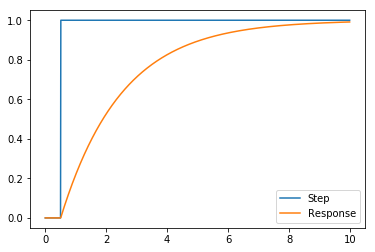

In [16]:
plot(t,u,t2,yout)
legend(["Step", "Response"])

In [ ]:
legend(['input','output'],2)
xlabel('Time (sec)')
ylabel('Amplitude')
title('Step Response')

df=1.0/T#(t.max()-t.min())
f=arange(0,fs,df)

s=2.0j*pi*f

#tf=1.0/s

N=len(f)

def bodeplot(fi,f,tf,clear=True):
    figure(fi)
    if clear:
        clf()
    subplot(211)
    semilogx(f,20*log10(abs(tf)))
    ylabel('Mag. Ratio (dB)')
    subplot(212)
    semilogx(f,arctan2(imag(tf),real(tf))*180.0/pi)
    ylabel('Phase (deg.)')
    xlabel('Freq. (Hz)')

#################################
#
#    Swept Sine
#
#################################
def Usweep(ti,minf=0.0,maxf=10.0, maxt=max(t)):
    if ti<0.0:
        return 0.0
    else:
        curf=(maxf-minf)*ti/maxt+minf
        if ti<(maxt*0.95):
            return sin(2*pi*curf*ti)
        else:
            return 0.0

Uchirp=array([Usweep(ti) for ti in t])#this line defins a swept sine input
yc=signal.lsim2(mysys,Uchirp,t)#this line calculates the response to the swept sine input
Uchirp=squeeze(Uchirp)
yco=yc[1]

figure(3)
clf()
subplot(211)
plot(t,Uchirp)
ylabel('input u(t)')
title('Swept Sine Response')
subplot(212)
plot(t,yco)
ylabel('output y(t)')
xlabel('Time (sec)')


ycfft=fft(yco)*2/N
ucfft=fft(Uchirp)*2/N
tfc=ycfft/ucfft

tfcheck=p/(s+p)

bodeplot(4,f,tfc)
bodeplot(4,f,tfcheck,clear=False)

fN=f[int(N/2)]
subplot(211)
xlim([0.1,fN])
legend(['experiment','model'],3)
title('Bode Plot')

subplot(212)
xlim([0.1,fN])
ylim([-100,10])

show()